# Fake News Detection

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

The following classification algorithms have been used in this project: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest, Stochastic Gradient Descent and Gradient Boosting.

1. PIP instal imblearn
2. Loading Required libaries and data
3. Exploratory Data Analysis
4. Data Pre-processing
5. Vectorization
6. SMOTE
7. Model building
8. Accuracy of different model
9. joblib to save
10. Conclusion

In [51]:
!pip3 install wordcloud

In [52]:
import re
import nltk
nltk.download()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import joblib
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


### Data Description

#### There are 6 columns in the dataset provided to you. The description of each of the column is given below:
    
1. id         :  Unique id of each news article
2. headline   :  It is the title of the news.
3. news       :  It contains the full text of the news article
4. Unnamed:0  :  It is a serial number
5. written_by :  It represents the author of the news article
6. label      :  It tells whether the news is fake (1) or not fake (0).


In [56]:
# getting csv formate data

data=pd.read_csv('train_news.csv')
data

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [57]:
# getting the unique values in a column, total number of unique values in a column

data.nunique()

Unnamed: 0    20800
id            20800
headline      19803
written_by     4201
news          20386
label             2
dtype: int64

In [58]:
# finding null values, each column gives out total number of null values of that column

print(data.isnull().sum())
print()

# finding percentage of missing values in each column

print(data.isnull().sum()/len(data)*100 )

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

Unnamed: 0    0.000000
id            0.000000
headline      2.682692
written_by    9.408654
news          0.187500
label         0.000000
dtype: float64


In [59]:
# getting information about each column which gives null value, count and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [60]:
#used to view some basic statistical details like percentile, mean, std and so on

data['label'].describe()

count    20800.000000
mean         0.500625
std          0.500012
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [61]:
data['news'][0]

'WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run his family business ventures  —   four   companies  —   while serving as governor. Mr

# Exploratory Data Analysis

1    50.0625
0    49.9375
Name: label, dtype: float64


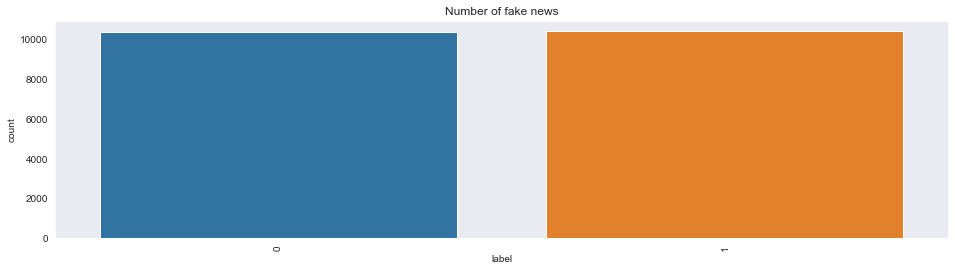

In [62]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style("dark")
print(data['label'].value_counts()/len(data)*100)
sb.countplot(x='label',data=data)
plt.xlabel('label')
plt.title('Number of fake news');

### Representing of spam with pie chart


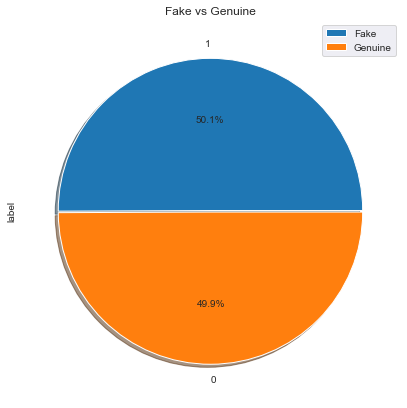

In [66]:
data["label"].value_counts().plot(kind = 'pie',
                                  explode=[0, 0.01],
                                  figsize=(8, 7),
                                  autopct='%1.1f%%',
                                  shadow=True)
plt.title("Fake vs Genuine")
plt.legend(["Fake", "Genuine"])
plt.show()

In [67]:
# Combining headline, written_by And news Together

data['News'] = data['headline'] + ' ' + data['written_by'] + ' ' + data['news']
data.head()

,Unnamed: 0,id,headline,written_by,news,label,News
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham...


### Visual representation of message length


In [68]:
# Length of each news 

data['length'] =data['News'].str.len()
data.head(10)

,Unnamed: 0,id,headline,written_by,news,label,News,length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...,8048.0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6201.0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...,534.0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co...",6630.0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham...,9211.0
5,5,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1,NaN,NaN
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0,Rapid Evolution Saved This Fish From Pollution...,4252.0
7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1,Alabama Prison Officials Retaliate Against Pri...,6417.0
8,8,13559,NaN,steventexas,People have made up their minds on president.\...,1,NaN,NaN
9,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1,Can We Live in a Constant State of Love? Gilli...,6435.0


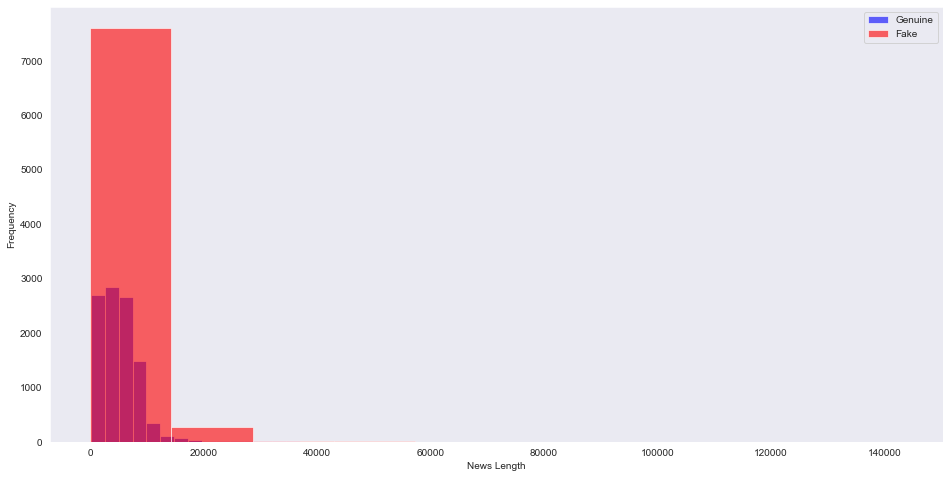

In [69]:
plt.figure(figsize=(16,8))
sb.set_style('dark')
data[data.label == 0].length.plot(bins=35, kind='hist', color='blue', label='Genuine', alpha=0.6)
data[data.label == 1].length.plot(kind='hist', color='red', label='Fake', alpha=0.6)
plt.legend()
plt.xlabel("News Length");

# Data PreProcessing

In [70]:
# removing column which is not useful for us

data.drop(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'length'], axis=1, inplace=True)
data.head()

,label,News
0,0,Ethics Questions Dogged Agriculture Nominee as...
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,1,A Digital 9/11 If Trump Wins Finian Cunningham...


In [71]:
print(data.isnull().sum()/len(data)*100)

label     0.000000
News     12.091346
dtype: float64


In [72]:
#dropping null values from the dataset

data = data.fillna(' ')
data.shape

(20800, 2)

In [73]:
print(data.isnull().any())
print(data.isnull().sum())

label    False
News     False
dtype: bool
label    0
News     0
dtype: int64


In [74]:
# Length of each news 

data['length'] =data['News'].str.len()
data.head(10)

,label,News,length
0,0,Ethics Questions Dogged Agriculture Nominee as...,8048
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6201
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...,534
3,0,"Paul LePage, Besieged Maine Governor, Sends Co...",6630
4,1,A Digital 9/11 If Trump Wins Finian Cunningham...,9211
5,1,,1
6,0,Rapid Evolution Saved This Fish From Pollution...,4252
7,1,Alabama Prison Officials Retaliate Against Pri...,6417
8,1,,1
9,1,Can We Live in a Constant State of Love? Gilli...,6435


In [75]:
# renaming the columns 

data.rename(columns={'label': 'Class'}, inplace=True)
data.head()

,Class,News,length
0,0,Ethics Questions Dogged Agriculture Nominee as...,8048
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6201
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...,534
3,0,"Paul LePage, Besieged Maine Governor, Sends Co...",6630
4,1,A Digital 9/11 If Trump Wins Finian Cunningham...,9211


### Cleaning text process


In [76]:
# The function to clean text

def clean_text(words):
    
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

data['News_cleaned_data'] = data['News'].apply(clean_text)
data.head()

,Class,News,length,News_cleaned_data
0,0,Ethics Questions Dogged Agriculture Nominee as...,8048,ethics questions dogged agriculture nominee as...
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6201,u s must dig deep to stop argentina s lionel m...
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...,534,cotton to house do not walk the plank and vote...
3,0,"Paul LePage, Besieged Maine Governor, Sends Co...",6630,paul lepage besieged maine governor sends conf...
4,1,A Digital 9/11 If Trump Wins Finian Cunningham...,9211,a digital if trump wins finian cunningham fini...


In [77]:
data['News_cleaned_data'][0]

'ethics questions dogged agriculture nominee as georgia governor the new york times eric lipton and steve eder washington in sonny perdue s telling georgians were growing weary of the corruption and scandals in their state when he took over as governor in a time when he gave his own version of a drain the swamp pledge my first goal as governor is to restore public trust in state government by changing the culture of state government mr perdue told a leadership conference at kennesaw state university in april our form of government depends on a mutual bond of trust between the people and their government but people have become cynical about their government but mr perdue a republican who is awaiting confirmation to serve as president trump s agriculture secretary became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor the criticism centers on the fact that as mr trump has he continued to own or help run his family busin

## Removing stop words


In [78]:
# Getting the stop words

stop_words = stopwords.words('english')
print(stop_words[::10])

# The function to removing stopwords

def remove_stopwords(text):

    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

data['News_removed_stopwords'] = data['News_cleaned_data'].apply(remove_stopwords)
data.head()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


,Class,News,length,News_cleaned_data,News_removed_stopwords
0,0,Ethics Questions Dogged Agriculture Nominee as...,8048,ethics questions dogged agriculture nominee as...,ethics questions dogged agriculture nominee ge...
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6201,u s must dig deep to stop argentina s lionel m...,u must dig deep stop argentina lionel messi ne...
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...,534,cotton to house do not walk the plank and vote...,cotton house walk plank vote bill cannot pass ...
3,0,"Paul LePage, Besieged Maine Governor, Sends Co...",6630,paul lepage besieged maine governor sends conf...,paul lepage besieged maine governor sends conf...
4,1,A Digital 9/11 If Trump Wins Finian Cunningham...,9211,a digital if trump wins finian cunningham fini...,digital trump wins finian cunningham finian cu...


In [79]:
data['News_removed_stopwords'][0]

'ethics questions dogged agriculture nominee georgia governor new york times eric lipton steve eder washington sonny perdue telling georgians growing weary corruption scandals state took governor time gave version drain swamp pledge first goal governor restore public trust state government changing culture state government mr perdue told leadership conference kennesaw state university april form government depends mutual bond trust people government people become cynical government mr perdue republican awaiting confirmation serve president trump agriculture secretary became target frequent criticism failing honor ethics pledge eight years governor criticism centers fact mr trump continued help run family business ventures four companies serving governor mr perdue one last cabinet members awaiting senate confirmation date set confirmation hearing holdup release paperwork accompanying nomination federal office government ethics blamed delay office must examine mr perdue proposal avoid co

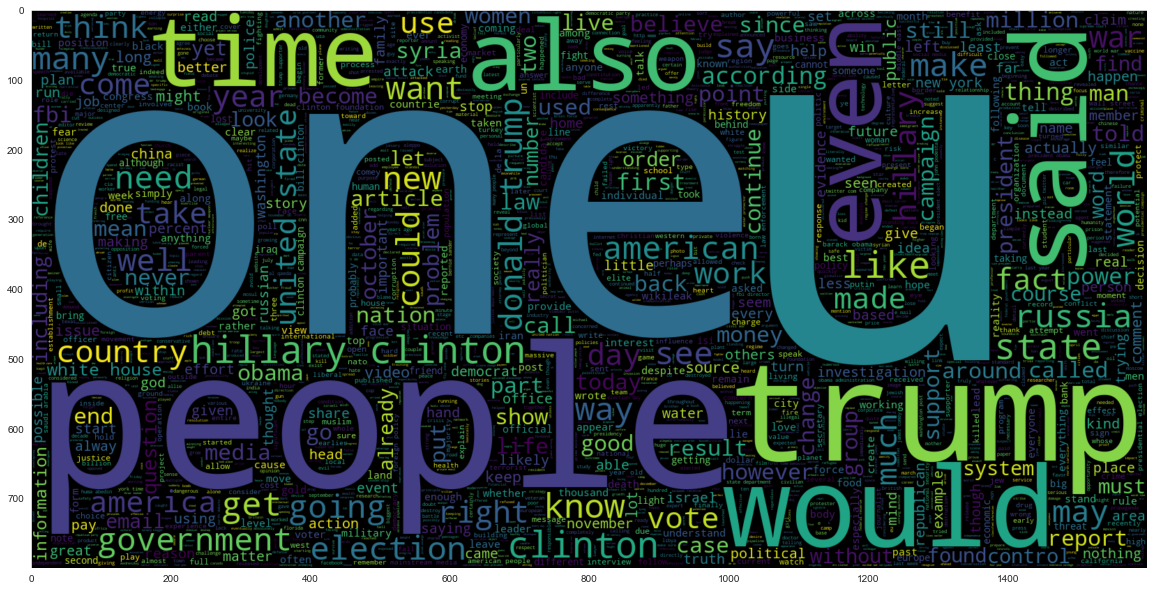

In [80]:
# Plotting The Word Cloud For genunie news

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , 
               width = 1600 , 
               height = 800 , 
               stopwords = stop_words).generate(" ".join(data[data.Class == 1].News_cleaned_data))

plt.imshow(wc, interpolation = 'bilinear')

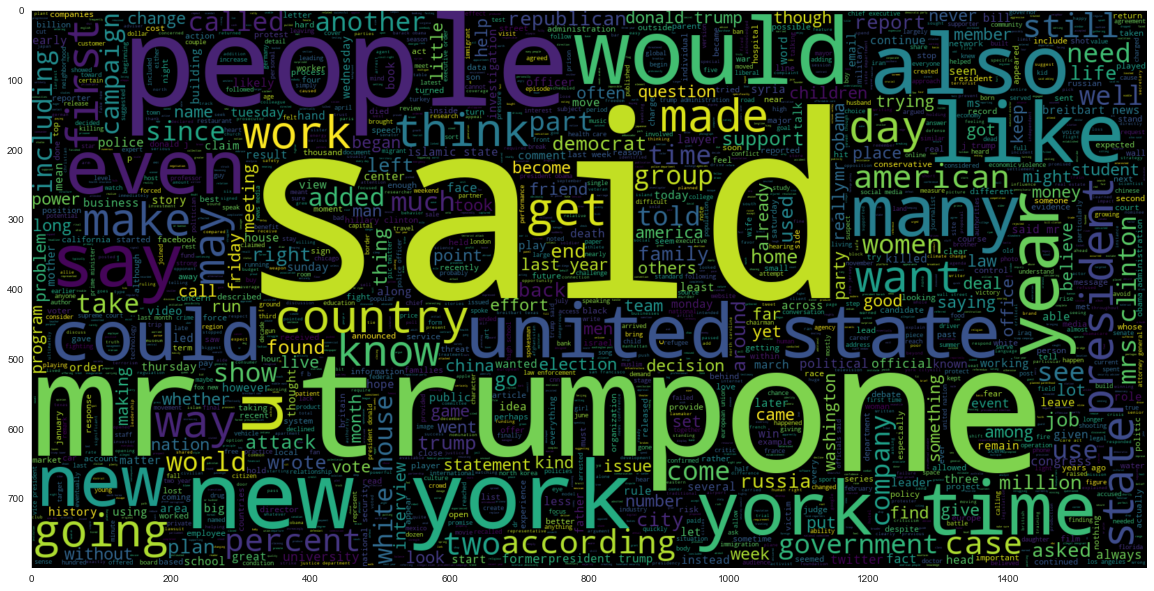

In [81]:
# Plotting The Word Cloud For fake news

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , 
               width = 1600 , 
               height = 800 , 
               stopwords = stop_words).generate(" ".join(data[data.Class == 0].News_cleaned_data))

plt.imshow(wc, interpolation = 'bilinear')

## Applying Stemming



In [82]:
porter = PorterStemmer()

# The function to apply stemming

def stemmer(stem_text):

    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

data['Fin_News'] = data['News_removed_stopwords'].apply(stemmer)
data.head()

,Class,News,length,News_cleaned_data,News_removed_stopwords,Fin_News
0,0,Ethics Questions Dogged Agriculture Nominee as...,8048,ethics questions dogged agriculture nominee as...,ethics questions dogged agriculture nominee ge...,ethic question dog agricultur nomine georgia g...
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6201,u s must dig deep to stop argentina s lionel m...,u must dig deep stop argentina lionel messi ne...,u must dig deep stop argentina lionel messi ne...
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...,534,cotton to house do not walk the plank and vote...,cotton house walk plank vote bill cannot pass ...,cotton hous walk plank vote bill cannot pass s...
3,0,"Paul LePage, Besieged Maine Governor, Sends Co...",6630,paul lepage besieged maine governor sends conf...,paul lepage besieged maine governor sends conf...,paul lepag besieg main governor send conflict ...
4,1,A Digital 9/11 If Trump Wins Finian Cunningham...,9211,a digital if trump wins finian cunningham fini...,digital trump wins finian cunningham finian cu...,digit trump win finian cunningham finian cunni...


In [83]:
data['Fin_News'][0]

'ethic question dog agricultur nomine georgia governor new york time eric lipton steve eder washington sonni perdu tell georgian grow weari corrupt scandal state took governor time gave version drain swamp pledg first goal governor restor public trust state govern chang cultur state govern mr perdu told leadership confer kennesaw state univers april form govern depend mutual bond trust peopl govern peopl becom cynic govern mr perdu republican await confirm serv presid trump agricultur secretari becam target frequent critic fail honor ethic pledg eight year governor critic center fact mr trump continu help run famili busi ventur four compani serv governor mr perdu one last cabinet member await senat confirm date set confirm hear holdup releas paperwork accompani nomin feder offic govern ethic blame delay offic must examin mr perdu propos avoid conflict interest run u depart known may includ sell farm asset tenur governor end complaint file mr perdu state ethic commiss two occas rule gov

In [84]:
#total number of words 

print(data['Fin_News'].apply(lambda x: len(x.split(' '))).sum())

8298120


#### After text cleaning and removing stop words, we have only 8298120 words
### Vectorization
To run machine learning algorithms we need to convert text files into numerical feature vectors.

We will use bag of words model for our analysis.

We spliting the complete data into X as message and y as class values:

In [85]:
X = data['Fin_News']
y = data['Class']

In [86]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

X_vec = vect.transform(X)

len(vect.get_feature_names())

272293

#### We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.23, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16016, 272293)
(4784, 272293)
(16016,)
(4784,)


## SMOTE
The target class variable is imbalanced, The simplest way to improve imbalanced dataset is balancing them by oversampling instances of the minority class or undersampling instances of the majority class.

We will try to balancing classes by using one of the advanced techniques like the SMOTE method

(Synthetic Minority Over-sampling Technique).

SMOTE technique is one of the most commonly used oversampling methods to solve the imbalance problem. It goal is to balance class distribution by randomly increasing minority class examples by replicating them.

In [88]:
# We will use imbalanced-learn library to apply SMOTE method

smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [89]:
# shape of training and testing after SMOTE

print(X_train_sm.shape)
print(y_train_sm.shape)

(16062, 272293)
(16062,)


# Model Building
### We use the following classification models:

1. Decision tree Classifier
2. Naive Bayes Classifier
3. Random Forest Classifier
4. Gradient Boosting
5. SVM (Support Vector Machine)
6. Stochastic Gradient Descent

#### To make the vectorizer > transformer > classifier easier to work with, we will use Pipeline class in SK-Learn.
# Decision tree Classifier

In [90]:
model_dtc = Pipeline([('tfidf', TfidfTransformer()),
                      ('model',DecisionTreeClassifier()),
                     ])

model_dtc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_0 = model_dtc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_0, y_test))
print(classification_report(ytest, pred_0))

accuracy 0.9782608695652174
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2402
           1       0.98      0.98      0.98      2382

    accuracy                           0.98      4784
   macro avg       0.98      0.98      0.98      4784
weighted avg       0.98      0.98      0.98      4784



# Naive Bayes Classifier

In [91]:
model_nbc = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',MultinomialNB()),
                   ])

model_nbc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_1 = model_nbc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_1, y_test))
print(classification_report(ytest, pred_1))

accuracy 0.7508361204013378
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2402
           1       1.00      0.50      0.67      2382

    accuracy                           0.75      4784
   macro avg       0.83      0.75      0.73      4784
weighted avg       0.83      0.75      0.73      4784



# Random Forest Classifier

In [92]:
model_rfc = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',RandomForestClassifier(n_estimators=50)),
                   ])

model_rfc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_2 = model_rfc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_2, y_test))
print(classification_report(ytest, pred_2))

accuracy 0.9303929765886287
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2402
           1       0.98      0.88      0.93      2382

    accuracy                           0.93      4784
   macro avg       0.94      0.93      0.93      4784
weighted avg       0.94      0.93      0.93      4784



# Gradient Boosting Classifier

In [93]:
model_gbc = Pipeline([('tfidf', TfidfTransformer()),
                    ('model', GradientBoostingClassifier(random_state=100, 
                                                         n_estimators=150,
                                                         min_samples_split=100, 
                                                         max_depth=6)),  ])

model_gbc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_3 = model_gbc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_3, y_test))
print(classification_report(ytest, pred_3))

accuracy 0.9826505016722408
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2402
           1       0.98      0.99      0.98      2382

    accuracy                           0.98      4784
   macro avg       0.98      0.98      0.98      4784
weighted avg       0.98      0.98      0.98      4784



# LinearSVC

In [94]:
model_svc = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',LinearSVC()),
                     ])

model_svc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_4 = model_svc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_4, y_test))
print(classification_report(ytest, pred_4))

accuracy 0.977633779264214
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2402
           1       0.97      0.98      0.98      2382

    accuracy                           0.98      4784
   macro avg       0.98      0.98      0.98      4784
weighted avg       0.98      0.98      0.98      4784



# Stochastic Gradient Descent

In [95]:
model_sgd = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',SGDClassifier()),
                     ])

model_sgd.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_5 = model_sgd.predict(X_test)

print('accuracy %s' % accuracy_score(pred_5, y_test))
print(classification_report(ytest, pred_5))

accuracy 0.9740802675585284
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2402
           1       0.97      0.98      0.97      2382

    accuracy                           0.97      4784
   macro avg       0.97      0.97      0.97      4784
weighted avg       0.97      0.97      0.97      4784



## Accuracy of different model
We tested six different models and now we will be finding the best model with accuracy.


In [96]:
dec_acc = accuracy_score(pred_0, y_test)
nb_acc  = accuracy_score(pred_1, y_test)
rf_acc  = accuracy_score(pred_2, y_test)
gb_acc  = accuracy_score(pred_3, y_test)
svm_acc = accuracy_score(pred_4, y_test)
sg_acc  = accuracy_score(pred_5, y_test)

In [97]:
# Geeting the best accuracy from these 6 models

models = pd.DataFrame({
                      'Model': ['Decision Tree', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'SVM', 'SGD'],
                      'Score': [dec_acc, nb_acc, rf_acc, gb_acc, svm_acc, sg_acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Gradient Boosting,0.982651
0,Decision Tree,0.978261
4,SVM,0.977634
5,SGD,0.974080
2,Random Forest,0.930393
1,Naive Bayes,0.750836


# joblib to save


In [98]:
# saving the best model based on accuracy

joblib.dump(model_gbc,'news_detection.pkl')

['news_detection.pkl']

# Conclusion
This project was aimed to text classification to determined whether the News is Fake or genuine. We started with the data cleaning and text mining, which cover change text into tokens, remove punctuation, stop words and normalization them by stemming. Following we used bag of words model to convert the text into numerical feature vectors.

Finally we started training six different classification models and we got the best accuracy of 0.982 for Gradient Boosting	and 0.978 for  Decision Tree.
